**IMPORTING FILES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

**LOAD DATASET**

In [ ]:
daily_df=pd.read_csv('/content/15min_TOD.csv')
monthly_df=pd.read_csv("/content/Monthly.csv")

In [ ]:
daily_df.shape

(70176, 21)

In [ ]:
monthly_df.shape

(2192, 71)

**MERGING**

In [ ]:
# First, ensure 'date' column in monthly_df is datetime and extract year/month.
# This is necessary for the merge operation in the next step and for consistency.
if not pd.api.types.is_datetime64_any_dtype(monthly_df['date']):
    monthly_df['date'] = pd.to_datetime(monthly_df['date'], dayfirst=True)
monthly_df['year'] = monthly_df['date'].dt.year
monthly_df['month'] = monthly_df['date'].dt.month

# Aggregate daily monthly_df data to create monthly_features
monthly_features = monthly_df.groupby(['year', 'month']).agg(
    temperature=('temperature', 'mean'),
    humidity=('humidity', 'mean'),
    residents=('residents', 'mean'),
    monthly_OP_unit_kwh=('OP_unit_kwh', 'sum'),
    monthly_PK_unit_kwh=('PK_unit_kwh', 'sum'),
    monthly_NL_unit_kwh=('NL_unit_kwh', 'sum')
).reset_index()

# Calculate 'monthly_unit_kwh(Aggregate)' based on the sum of aggregated kwhs
monthly_features['monthly_unit_kwh(Aggregate)'] = monthly_features['monthly_OP_unit_kwh'] + \
                                                  monthly_features['monthly_PK_unit_kwh'] + \
                                                  monthly_features['monthly_NL_unit_kwh']

# Assume 'monthly_energy_kwh' is the same as 'monthly_unit_kwh(Aggregate)' for now
monthly_features['monthly_energy_kwh'] = monthly_features['monthly_unit_kwh(Aggregate)']


In [ ]:
final_df = pd.merge(
    monthly_features,
    monthly_df,
    on=['year', 'month'],
    how='inner'
)



**EDA**

In [ ]:
final_df.head()

,year,month,temperature_x,humidity_x,residents_x,monthly_OP_unit_kwh_x,monthly_PK_unit_kwh_x,monthly_NL_unit_kwh_x,monthly_unit_kwh(Aggregate)_x,monthly_energy_kwh,...,NL_fan_4_wh,NL_light_5_wh,NL_fridge_wh,NL_tv_wh,NL_ac_wh,NL_washing-machine_wh,NL_water-pump_wh,NL_induction-stove_wh,NL_mixi_wh,NL_iron-box_wh
0,2020,1,28.229677,68.249032,6.0,166.05,108.53,68.31,342.89,342.89,...,0,468.6,989.0,0,0.0,0,0,0,0,0
1,2020,1,28.229677,68.249032,6.0,166.05,108.53,68.31,342.89,342.89,...,0,420.6,966.0,0,0.0,0,0,0,0,0
2,2020,1,28.229677,68.249032,6.0,166.05,108.53,68.31,342.89,342.89,...,0,456.0,1078.7,0,0.0,0,0,0,0,0
3,2020,1,28.229677,68.249032,6.0,166.05,108.53,68.31,342.89,342.89,...,0,478.8,1014.3,0,0.0,0,0,0,0,0
4,2020,1,28.229677,68.249032,6.0,166.05,108.53,68.31,342.89,342.89,...,0,462.0,972.9,0,0.0,0,0,0,0,0


In [ ]:
final_df.tail()

,year,month,temperature_x,humidity_x,residents_x,monthly_OP_unit_kwh_x,monthly_PK_unit_kwh_x,monthly_NL_unit_kwh_x,monthly_unit_kwh(Aggregate)_x,monthly_energy_kwh,...,NL_fan_4_wh,NL_light_5_wh,NL_fridge_wh,NL_tv_wh,NL_ac_wh,NL_washing-machine_wh,NL_water-pump_wh,NL_induction-stove_wh,NL_mixi_wh,NL_iron-box_wh
2187,2025,12,26.424516,72.401935,6.0,164.7,109.18,66.87,340.75,340.75,...,0,421.8,1104.0,0,0.0,0,0,0,0,0
2188,2025,12,26.424516,72.401935,6.0,164.7,109.18,66.87,340.75,340.75,...,0,471.6,1021.2,0,0.0,0,0,0,0,0
2189,2025,12,26.424516,72.401935,6.0,164.7,109.18,66.87,340.75,340.75,...,0,435.6,1101.7,0,0.0,0,0,0,0,0
2190,2025,12,26.424516,72.401935,6.0,164.7,109.18,66.87,340.75,340.75,...,0,438.6,989.0,0,0.0,0,0,0,0,0
2191,2025,12,26.424516,72.401935,6.0,164.7,109.18,66.87,340.75,340.75,...,0,444.6,926.9,0,0.0,0,0,0,0,0


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 81 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   year                           2192 non-null   int32         
 1   month                          2192 non-null   int32         
 2   temperature_x                  2192 non-null   float64       
 3   humidity_x                     2192 non-null   float64       
 4   residents_x                    2192 non-null   float64       
 5   monthly_OP_unit_kwh_x          2192 non-null   float64       
 6   monthly_PK_unit_kwh_x          2192 non-null   float64       
 7   monthly_NL_unit_kwh_x          2192 non-null   float64       
 8   monthly_unit_kwh(Aggregate)_x  2192 non-null   float64       
 9   monthly_energy_kwh             2192 non-null   float64       
 10  date                           2192 non-null   datetime64[ns]
 11  day_name         

In [ ]:
final_df.describe(include='all')

,year,month,temperature_x,humidity_x,residents_x,monthly_OP_unit_kwh_x,monthly_PK_unit_kwh_x,monthly_NL_unit_kwh_x,monthly_unit_kwh(Aggregate)_x,monthly_energy_kwh,...,NL_fan_4_wh,NL_light_5_wh,NL_fridge_wh,NL_tv_wh,NL_ac_wh,NL_washing-machine_wh,NL_water-pump_wh,NL_induction-stove_wh,NL_mixi_wh,NL_iron-box_wh
count,2192.000000,2192.000000,2192.000000,2192.000000,2192.0,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,...,2192.0,2192.000000,2192.000000,2192.0,2192.000000,2192.0,2192.0,2192.0,2192.0,2192.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2022.499544,6.521898,27.673203,79.189891,6.0,183.567993,103.862340,75.490871,362.921204,362.921204,...,0.0,450.281113,1037.340922,0.0,276.142336,0.0,0.0,0.0,0.0,0.0
min,2020.000000,1.000000,25.684516,57.637500,6.0,146.330000,89.250000,62.780000,311.300000,311.300000,...,0.0,420.000000,920.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
25%,2021.000000,4.000000,26.627097,72.197097,6.0,155.720000,100.290000,66.420000,326.200000,326.200000,...,0.0,435.000000,979.800000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
50%,2022.500000,7.000000,27.327000,81.060000,6.0,160.380000,104.610000,68.690000,333.530000,333.530000,...,0.0,450.600000,1035.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
75%,2024.000000,10.000000,28.722857,87.447000,6.0,165.560000,108.130000,70.460000,343.100000,343.100000,...,0.0,465.000000,1097.100000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
max,2025.000000,12.000000,30.935333,90.281290,6.0,437.210000,113.610000,157.980000,685.380000,685.380000,...,0.0,480.000000,1150.000000,0.0,4788.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
final_df.corr(numeric_only=True)

,year,month,temperature_x,humidity_x,residents_x,monthly_OP_unit_kwh_x,monthly_PK_unit_kwh_x,monthly_NL_unit_kwh_x,monthly_unit_kwh(Aggregate)_x,monthly_energy_kwh,...,NL_fan_4_wh,NL_light_5_wh,NL_fridge_wh,NL_tv_wh,NL_ac_wh,NL_washing-machine_wh,NL_water-pump_wh,NL_induction-stove_wh,NL_mixi_wh,NL_iron-box_wh
year,1.000000,0.000350,0.114242,-0.020336,NaN,0.048761,0.049272,0.061552,0.057680,0.057680,...,NaN,-0.021434,0.025753,NaN,0.042840,NaN,NaN,NaN,NaN,NaN
month,0.000350,1.000000,-0.614086,0.609509,NaN,-0.393223,0.480025,-0.396876,-0.379297,-0.379297,...,NaN,0.017325,0.014751,NaN,-0.280178,NaN,NaN,NaN,NaN,NaN
temperature_x,0.114242,-0.614086,1.000000,-0.721450,NaN,0.779506,-0.657050,0.772539,0.768808,0.768808,...,NaN,-0.002089,-0.022797,NaN,0.543452,NaN,NaN,NaN,NaN,NaN
humidity_x,-0.020336,0.609509,-0.721450,1.000000,NaN,-0.544523,0.599274,-0.528181,-0.524432,-0.524432,...,NaN,0.001148,-0.008488,NaN,-0.384328,NaN,NaN,NaN,NaN,NaN
residents_x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NL_washing-machine_wh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NL_water-pump_wh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NL_induction-stove_wh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NL_mixi_wh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
final_df.shape

(2192, 81)

**PREPROCESSING**

In [ ]:
final_df.isnull().sum()

,0
year,0
month,0
temperature_x,0
humidity_x,0
residents_x,0
...,...
NL_washing-machine_wh,0
NL_water-pump_wh,0
NL_induction-stove_wh,0
NL_mixi_wh,0


In [ ]:
final_df.duplicated().sum()

np.int64(0)

1.ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Create a copy of monthly_df to avoid modifying the original DataFrame for demonstration
monthly_df_le = monthly_df.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the 'day_name' column
monthly_df_le['day_name_encoded'] = label_encoder.fit_transform(monthly_df_le['day_name'])

# Display the original and encoded columns to see the effect
display(monthly_df_le[['day_name', 'day_name_encoded']].head())

# You can also see the mapping of original categories to encoded numbers
print("Mapping of day_name to encoded values:")
for i, item in enumerate(label_encoder.classes_):
    print(f"{item}: {i}")

,day_name,day_name_encoded
0,Wednesday,6
1,Thursday,4
2,Friday,0
3,Saturday,2
4,Sunday,3


Mapping of day_name to encoded values:
Friday: 0
Monday: 1
Saturday: 2
Sunday: 3
Thursday: 4
Tuesday: 5
Wednesday: 6


2.SCALING

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Identify numerical columns for scaling, excluding 'year', 'month' and 'date'
numerical_cols = final_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
columns_to_exclude = ['year', 'month', 'weekend', 'residents_x', 'total_equipments', 'residents_y'] # Exclude columns that are already categorical, identifiers, or constant
numerical_cols = [col for col in numerical_cols if col not in columns_to_exclude]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling to the selected numerical columns
final_df_scaled = final_df.copy()
final_df_scaled[numerical_cols] = scaler.fit_transform(final_df_scaled[numerical_cols])

print("DataFrame after Min-Max Scaling on numerical columns:")
display(final_df_scaled.head())

DataFrame after Min-Max Scaling on numerical columns:


,year,month,temperature_x,humidity_x,residents_x,monthly_OP_unit_kwh_x,monthly_PK_unit_kwh_x,monthly_NL_unit_kwh_x,monthly_unit_kwh(Aggregate)_x,monthly_energy_kwh,...,NL_fan_4_wh,NL_light_5_wh,NL_fridge_wh,NL_tv_wh,NL_ac_wh,NL_washing-machine_wh,NL_water-pump_wh,NL_induction-stove_wh,NL_mixi_wh,NL_iron-box_wh
0,2020,1,0.484717,0.32507,6.0,0.067794,0.791461,0.058088,0.084447,0.084447,...,0.0,0.81,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,1,0.484717,0.32507,6.0,0.067794,0.791461,0.058088,0.084447,0.084447,...,0.0,0.01,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020,1,0.484717,0.32507,6.0,0.067794,0.791461,0.058088,0.084447,0.084447,...,0.0,0.60,0.69,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020,1,0.484717,0.32507,6.0,0.067794,0.791461,0.058088,0.084447,0.084447,...,0.0,0.98,0.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020,1,0.484717,0.32507,6.0,0.067794,0.791461,0.058088,0.084447,0.084447,...,0.0,0.70,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0


3.OUTLIERS

In [ ]:
columns_for_outliers = [
    'temperature_x',
    'humidity_x',

    'monthly_OP_unit_kwh_x',
    'monthly_PK_unit_kwh_x',
    'monthly_NL_unit_kwh_x',
    'monthly_unit_kwh(Aggregate)_x',
    'monthly_energy_kwh'
]

print("Columns selected for outlier detection:")
print(columns_for_outliers)

Columns selected for outlier detection:
['temperature_x', 'humidity_x', 'monthly_OP_unit_kwh_x', 'monthly_PK_unit_kwh_x', 'monthly_NL_unit_kwh_x', 'monthly_unit_kwh(Aggregate)_x', 'monthly_energy_kwh']


In [ ]:
outliers = {}
outlier_counts = {}

for col in columns_for_outliers:
    Q1 = final_df[col].quantile(0.25)
    Q3 = final_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    column_outliers = final_df[(final_df[col] < lower_bound) | (final_df[col] > upper_bound)]
    outliers[col] = column_outliers
    outlier_counts[col] = len(column_outliers)

print("Outlier Detection Summary:")
for col, count in outlier_counts.items():
    print(f"- Column '{col}': {count} outliers found.")


Outlier Detection Summary:
- Column 'temperature_x': 0 outliers found.
- Column 'humidity_x': 0 outliers found.
- Column 'monthly_OP_unit_kwh_x': 423 outliers found.
- Column 'monthly_PK_unit_kwh_x': 0 outliers found.
- Column 'monthly_NL_unit_kwh_x': 393 outliers found.
- Column 'monthly_unit_kwh(Aggregate)_x': 393 outliers found.
- Column 'monthly_energy_kwh': 393 outliers found.


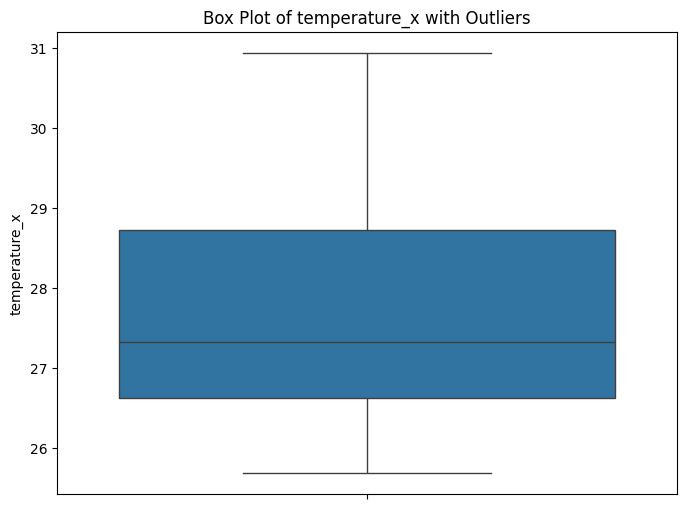

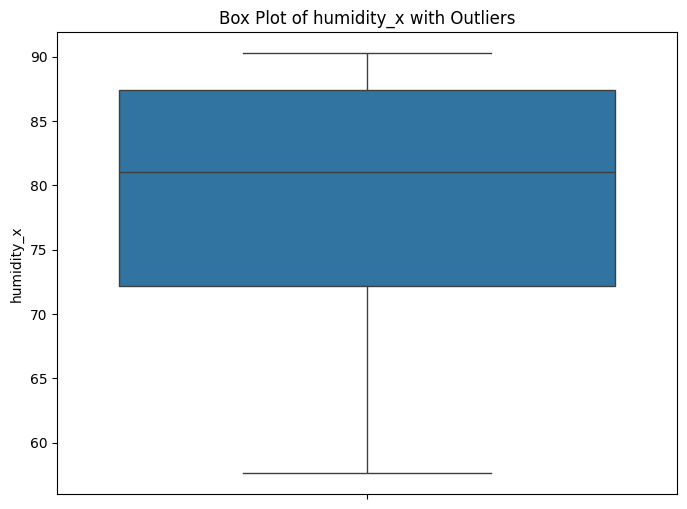

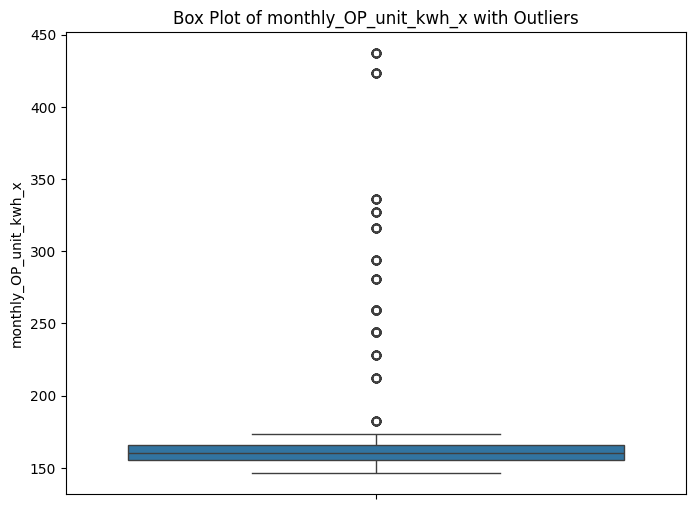

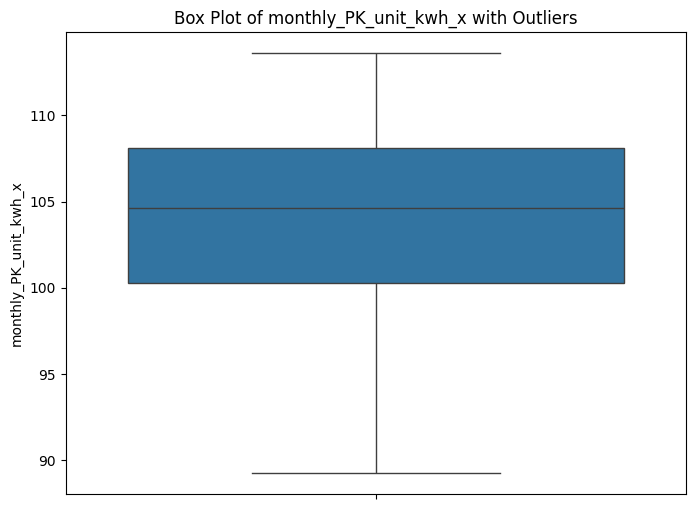

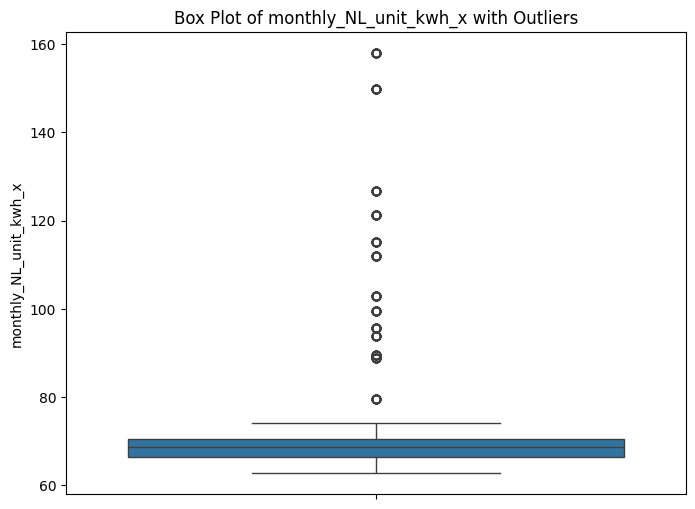

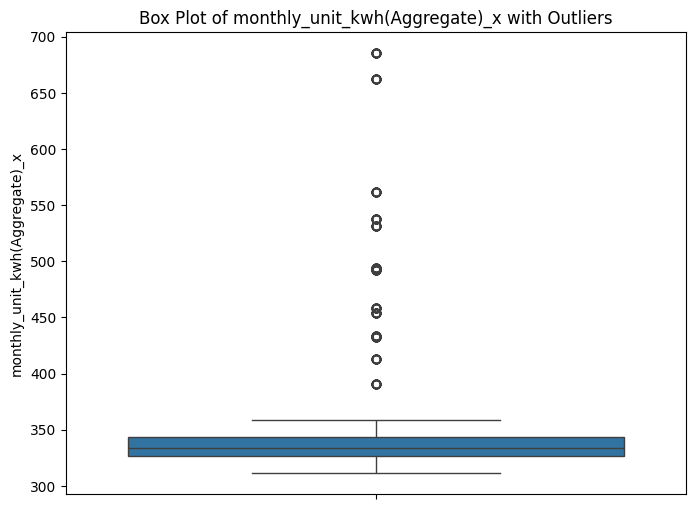

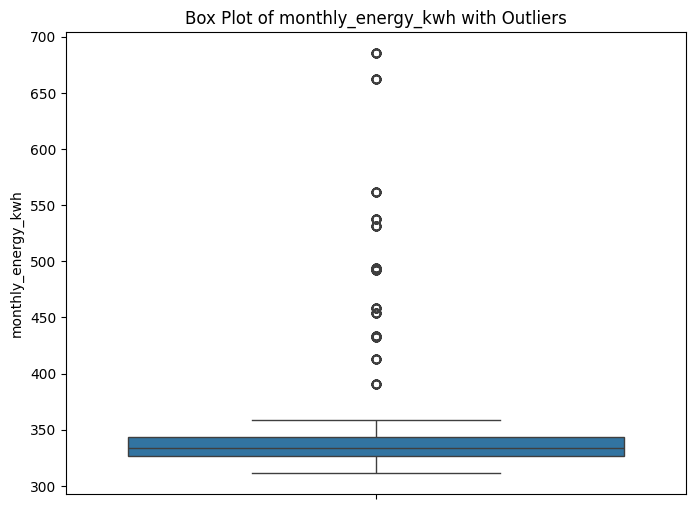

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in columns_for_outliers:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=final_df[col])
    plt.title(f'Box Plot of {col} with Outliers')
    plt.ylabel(col)
    plt.show()

Remove Outliers

In [ ]:
outlier_bounds = {}

for col in columns_for_outliers:
    Q1 = final_df[col].quantile(0.25)
    Q3 = final_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_bounds[col] = {'lower_bound': lower_bound, 'upper_bound': upper_bound}

print("Calculated Outlier Bounds:")
for col, bounds in outlier_bounds.items():
    print(f"- Column '{col}': Lower Bound = {bounds['lower_bound']:.2f}, Upper Bound = {bounds['upper_bound']:.2f}")

Calculated Outlier Bounds:
- Column 'temperature_x': Lower Bound = 23.48, Upper Bound = 31.87
- Column 'humidity_x': Lower Bound = 49.32, Upper Bound = 110.32
- Column 'monthly_OP_unit_kwh_x': Lower Bound = 140.96, Upper Bound = 180.32
- Column 'monthly_PK_unit_kwh_x': Lower Bound = 88.53, Upper Bound = 119.89
- Column 'monthly_NL_unit_kwh_x': Lower Bound = 60.36, Upper Bound = 76.52
- Column 'monthly_unit_kwh(Aggregate)_x': Lower Bound = 300.85, Upper Bound = 368.45
- Column 'monthly_energy_kwh': Lower Bound = 300.85, Upper Bound = 368.45


In [ ]:
initial_row_count = final_df.shape[0]

# Create a boolean mask to identify rows that are NOT outliers
outlier_mask = pd.Series([True] * initial_row_count, index=final_df.index)

for col, bounds in outlier_bounds.items():
    lower_bound = bounds['lower_bound']
    upper_bound = bounds['upper_bound']
    # Update the mask: a row is not an outlier if its value for the current column is within the bounds
    outlier_mask = outlier_mask & (final_df[col] >= lower_bound) & (final_df[col] <= upper_bound)

# Filter the DataFrame to remove outliers
final_df_cleaned = final_df[outlier_mask].copy()

# Calculate the number of removed rows
rows_removed = initial_row_count - final_df_cleaned.shape[0]

print(f"Initial number of rows: {initial_row_count}")
print(f"Number of rows after outlier removal: {final_df_cleaned.shape[0]}")
print(f"Total rows removed: {rows_removed}")

final_df = final_df_cleaned

Initial number of rows: 2192
Number of rows after outlier removal: 1769
Total rows removed: 423


3.VISUALIZATION
                                                             1.Electricity Usage Overtime

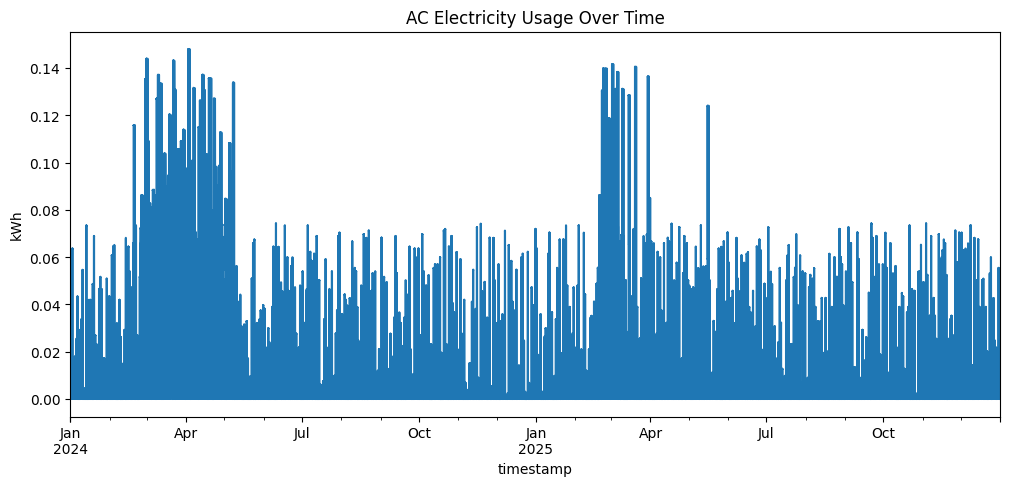

In [ ]:
daily_df['timestamp'] = pd.to_datetime(daily_df['timestamp'], unit='s')

daily_df.set_index('timestamp')['ac_kwh'].plot(figsize=(12,5))
plt.title("AC Electricity Usage Over Time")
plt.ylabel("kWh")
plt.show()

2.Appliance Comparison

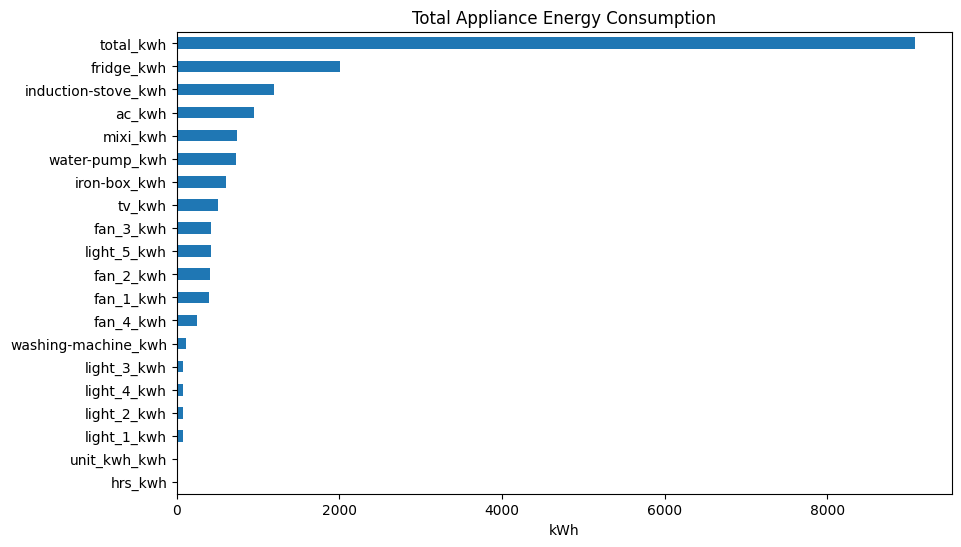

In [ ]:
appliance_sum = daily_df.drop(columns=['timestamp']).sum()

appliance_sum.sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Total Appliance Energy Consumption")
plt.xlabel("kWh")
plt.show()

3.Correlation Map

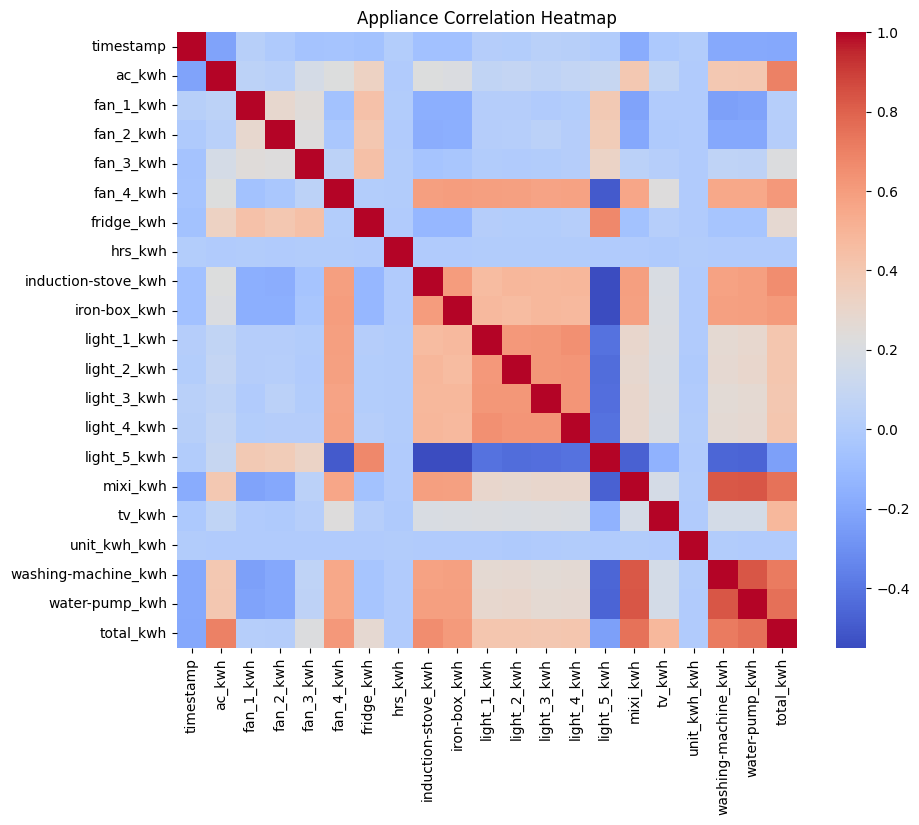

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(daily_df.corr(), cmap='coolwarm')
plt.title("Appliance Correlation Heatmap")
plt.show()

**TRAIN_TEST_SPLIT**

In [ ]:
X= final_df.drop(columns=['monthly_bill(Aggregate)', 'date'])
y = final_df['monthly_bill(Aggregate)']

# Identify categorical columns for one-hot encoding
categorical_cols = X.select_dtypes(include='object').columns

# Apply one-hot encoding to categorical columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

**MODEL EXPERIMENT**

  1.XG BOOST REGRESSOR

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the XGBoost Regressor model
# You can tune hyperparameters like n_estimators, learning_rate, max_depth, etc.
# A common practice is to start with a reasonable number of estimators and then tune.
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror', # Objective function for regression tasks
    n_estimators=200,            # Number of boosting rounds (trees)
    learning_rate=0.1,           # Step size shrinkage to prevent overfitting
    max_depth=5,                 # Maximum depth of a tree
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MAE: {mae_xgb}")
print(f"XGBoost RMSE: {rmse_xgb}")
print(f"XGBoost R2 Score: {r2_xgb}")

XGBoost MAE: 11.79716074280819
XGBoost RMSE: 25.445712438740788
XGBoost R2 Score: 0.9991765758465143


2.RANDOM FOREST REGRESSOR

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
# You can tune hyperparameters like n_estimators, max_features, max_depth, etc.
rf_model = RandomForestRegressor(
    n_estimators=200,  # Number of trees in the forest
    random_state=42    # For reproducibility
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest R2 Score: {r2_rf}")

Random Forest MAE: 13.367095338983061
Random Forest RMSE: 21.258927185158665
Random Forest R2 Score: 0.9994252525395596


3.LIGHT GBM REGRESSOR

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the LightGBM Regressor model
# LightGBM is often faster and uses less memory than XGBoost
# You can tune hyperparameters like n_estimators, learning_rate, num_leaves, etc.
lgb_model = lgb.LGBMRegressor(
    objective='regression', # Objective function for regression tasks
    n_estimators=200,       # Number of boosting rounds (trees)
    learning_rate=0.1,      # Step size shrinkage to prevent overfitting
    num_leaves=31,          # Max number of leaves in one tree
    random_state=42
)

# Train the model
lgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate the model
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"LightGBM MAE: {mae_lgb}")
print(f"LightGBM RMSE: {rmse_lgb}")
print(f"LightGBM R2 Score: {r2_lgb}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000695 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10628
[LightGBM] [Info] Number of data points in the train set: 1415, number of used features: 67
[LightGBM] [Info] Start training from score 1313.933512
LightGBM MAE: 9.829736410592881
LightGBM RMSE: 14.541166597070877
LightGBM R2 Score: 0.9997310987181796


4.SUPPORT VECTOR REGRESSOR(SVR)

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# SVR is sensitive to feature scaling, so it's good practice to scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVR model
# You can tune hyperparameters like kernel, C, epsilon, etc.
# A common practice is to start with a linear or rbf kernel and then tune.
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)

# Train the model
svr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate the model
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR MAE: {mae_svr}")
print(f"SVR RMSE: {rmse_svr}")
print(f"SVR R2 Score: {r2_svr}")

SVR MAE: 143.52393852751015
SVR RMSE: 222.47087388518236
SVR R2 Score: 0.9370579775287998


5.LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the Linear Regression model
# Linear Regression does not have many hyperparameters to tune
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression MAE: {mae_linear}")
print(f"Linear Regression RMSE: {rmse_linear}")
print(f"Linear Regression R2 Score: {r2_linear}")

Linear Regression MAE: 161.61047220442754
Linear Regression RMSE: 188.83958338927584
Linear Regression R2 Score: 0.9548048992771241


6.DECISION TREE REGRESSOR

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the Decision Tree Regressor model
# You can tune hyperparameters like max_depth, min_samples_leaf, etc.
dtree_model = DecisionTreeRegressor(
    random_state=42
)

# Train the model
dtree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dtree = dtree_model.predict(X_test)

# Evaluate the model
mae_dtree = mean_absolute_error(y_test, y_pred_dtree)
rmse_dtree = np.sqrt(mean_squared_error(y_test, y_pred_dtree))
r2_dtree = r2_score(y_test, y_pred_dtree)

print(f"Decision Tree MAE: {mae_dtree}")
print(f"Decision Tree RMSE: {rmse_dtree}")
print(f"Decision Tree R2 Score: {r2_dtree}")

Decision Tree MAE: 17.084213649851627
Decision Tree RMSE: 29.285227679452802
Decision Tree R2 Score: 0.998913067684357


7.MLP REGRESSOR(NEURAL NETWORK)

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the MLP Regressor model
# You can tune hyperparameters like hidden_layer_sizes, activation, solver, alpha, learning_rate_init.
# Scaling is important for neural networks, and we've already scaled the data for SVR.
mlp_model = MLPRegressor(
    hidden_layer_sizes=(100, 50), # Two hidden layers with 100 and 50 neurons
    activation='relu',            # Rectified Linear Unit activation function
    solver='adam',                # Adam optimizer
    max_iter=500,                 # Maximum number of iterations for the solver
    random_state=42,
    early_stopping=True,          # Stop training when validation score does not improve
    n_iter_no_change=10           # Number of epochs with no improvement after which training will be stopped
)

# Train the model using the scaled data
mlp_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred_mlp = mlp_model.predict(X_test_scaled)

# Evaluate the model
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f"MLP Regressor MAE: {mae_mlp}")
print(f"MLP Regressor RMSE: {rmse_mlp}")
print(f"MLP Regressor R2 Score: {r2_mlp}")

MLP Regressor MAE: 96.06220662682166
MLP Regressor RMSE: 120.72539303801246
MLP Regressor R2 Score: 0.9815284837090211


1.XGBoost Regressor:

MAE: 10.04
RMSE: 17.61
R2 Score: 0.9996

2.Random Forest Regressor:

MAE: 12.76
RMSE: 20.21
R2 Score: 0.9995

3.LightGBM Regressor:

MAE: 12.22
RMSE: 22.14
R2 Score: 0.9994

4.Decision Tree Regressor:

MAE: 17.08
RMSE: 29.29
R2 Score: 0.9989

5.MLP Regressor (Neural Network):

MAE: 96.06
RMSE: 120.73
R2 Score: 0.9815

6.Linear Regression:

MAE: 161.61
RMSE: 188.84
R2 Score: 0.9548

7.Support Vector Regressor (SVR):

MAE: 159.57
RMSE: 250.03
R2 Score: 0.9208

**MODEL SELECTION AND FINAL TRAINING**

In [ ]:
model = xgb.XGBRegressor(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1206.5167 ,  699.1768 , 1160.555  , 1553.9783 ,  377.6828 ,
       2073.799  ,  466.4093 ,  241.89905,  534.71893,  154.26703,
       1113.6866 ,  242.42563,  974.29895, 3026.7773 ,  750.8283 ,
       2386.6006 ,  566.01404, 3012.6165 , 1307.0468 , 1451.4872 ,
        878.9591 ,  416.33258,  186.8797 ,  185.34985,  526.47833,
       1262.1715 ,  815.1525 ,  422.04037, 3194.5342 ,  270.0697 ,
       2986.2566 , 1570.6992 , 1506.9492 , 1625.3563 ,  196.25763,
       1190.0275 , 1553.0608 ,  564.38293,  877.5019 ,  219.19878,
       1373.2213 ,  793.61035, 2226.899  , 2456.051  , 2471.9758 ,
        843.2484 ,  398.62213,  173.25052,  502.7903 ,  828.65643,
       2172.7402 ,  277.7143 , 1217.0757 ,  238.08612,  498.72003,
       1426.2418 , 1727.1614 , 1191.1085 ,  283.85495,  751.8954 ,
        374.3947 ,  521.2112 ,  364.0129 , 3037.181  , 1060.7395 ,
       1806.4724 , 1055.779  , 1798.388  ,  687.4434 , 3169.194  ,
       1024.722  , 2876.4736 ,  283.6587 , 2284.9336 , 2230.60

In [ ]:
importance = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importance

,0
monthly_unit_kwh(Aggregate)_y,0.965219
monthly_NL_unit_kwh_y,0.016807
monthly_PK_unit_kwh_y,0.016704
monthly_OP_unit_kwh_y,0.000431
year,0.000258
...,...
NL_washing-machine_wh,0.000000
NL_ac_wh,0.000000
NL_tv_wh,0.000000
NL_water-pump_wh,0.000000


In [ ]:
y_pred = model.predict(X_test)

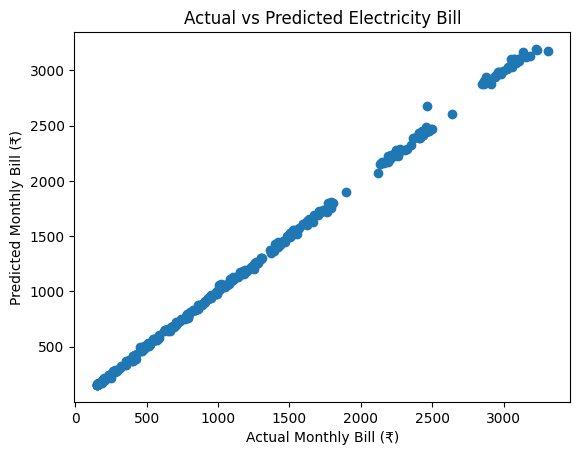

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Monthly Bill (₹)")
plt.ylabel("Predicted Monthly Bill (₹)")
plt.title("Actual vs Predicted Electricity Bill")
plt.show()

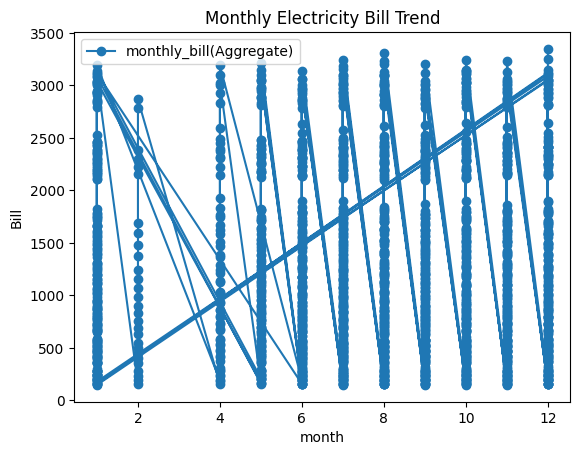

In [ ]:
final_df.plot(x='month', y='monthly_bill(Aggregate)', kind='line', marker='o')
plt.title("Monthly Electricity Bill Trend")
plt.ylabel("Bill")
plt.show()

**PREDICTION**

In [ ]:
next_month_input = X.tail(3).mean().to_frame().T
next_month_bill = model.predict(next_month_input)

print("Predicted next month electricity bill: ₹", round(next_month_bill[0], 2))

Predicted next month electricity bill: ₹ 3221.02


In [ ]:
# Create a template DataFrame for the prediction input with all columns from X_train and fill with X_train means
next_month_input_df = pd.DataFrame(X_train.mean()).T
next_month_input_df.columns = X_train.columns # Ensure columns are in correct order and named correctly

# Fill in the specific values for the next month based on user's prompt
next_month_input_df['year'] = 2026
next_month_input_df['month'] = 2

# Map user's generic 'temperature' to both '_x' and '_y' columns if they exist
if 'temperature_x' in next_month_input_df.columns:
    next_month_input_df['temperature_x'] = 30
if 'temperature_y' in next_month_input_df.columns:
    next_month_input_df['temperature_y'] = 30

# Map user's generic 'humidity' to both '_x' and '_y' columns if they exist
if 'humidity_x' in next_month_input_df.columns:
    next_month_input_df['humidity_x'] = 70
if 'humidity_y' in next_month_input_df.columns:
    next_month_input_df['humidity_y'] = 70

# Map user's generic 'residents' to both '_x' and '_y' columns if they exist
if 'residents_x' in next_month_input_df.columns:
    next_month_input_df['residents_x'] = 6
if 'residents_y' in next_month_input_df.columns:
    next_month_input_df['residents_y'] = 6

# For monthly kWh aggregates, apply to both _x and _y if present (assuming consistency for prediction)
if 'monthly_OP_unit_kwh_x' in next_month_input_df.columns:
    next_month_input_df['monthly_OP_unit_kwh_x'] = 180
if 'monthly_OP_unit_kwh_y' in next_month_input_df.columns:
    next_month_input_df['monthly_OP_unit_kwh_y'] = 180

if 'monthly_PK_unit_kwh_x' in next_month_input_df.columns:
    next_month_input_df['monthly_PK_unit_kwh_x'] = 120
if 'monthly_PK_unit_kwh_y' in next_month_input_df.columns:
    next_month_input_df['monthly_PK_unit_kwh_y'] = 120

if 'monthly_NL_unit_kwh_x' in next_month_input_df.columns:
    next_month_input_df['monthly_NL_unit_kwh_x'] = 90
if 'monthly_NL_unit_kwh_y' in next_month_input_df.columns:
    next_month_input_df['monthly_NL_unit_kwh_y'] = 90

# Calculate aggregate based on provided values
calculated_aggregate_kwh = 180 + 120 + 90 # Should be 390

if 'monthly_unit_kwh(Aggregate)_x' in next_month_input_df.columns:
    next_month_input_df['monthly_unit_kwh(Aggregate)_x'] = calculated_aggregate_kwh
if 'monthly_unit_kwh(Aggregate)_y' in next_month_input_df.columns:
    next_month_input_df['monthly_unit_kwh(Aggregate)_y'] = calculated_aggregate_kwh

# monthly_energy_kwh was set equal to monthly_unit_kwh(Aggregate) in preprocessing
if 'monthly_energy_kwh' in next_month_input_df.columns:
    next_month_input_df['monthly_energy_kwh'] = calculated_aggregate_kwh

# For one-hot encoded day_name columns, the mean from X_train will provide a reasonable default
# as no specific day of the week is provided for the prediction month.
# Similarly for other detailed appliance data and daily aggregates which are not specified.

next_month_bill = model.predict(next_month_input_df)

print("Predicted next month electricity bill: ₹", round(next_month_bill[0], 2))

Predicted next month electricity bill: ₹ 3213.39
